# **Exploratory Data Analysis Lab**


Estimated time needed: **30** minutes


In this module you get to work with the cleaned dataset from the previous module.

In this assignment you will perform the task of exploratory data analysis.
You will find out the distribution of data, presence of outliers and also determine the correlation between different columns in the dataset.


## Objectives


In this lab you will perform the following:


-   Identify the distribution of data in the dataset.

-   Identify outliers in the dataset.

-   Remove outliers from the dataset.

-   Identify correlation between features in the dataset.


* * *


## Hands on Lab


Import the pandas module.


In [1]:
import pandas as pd

Load the dataset into a dataframe.


In [2]:
#df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m2_survey_data.csv")
#df.head()

In [3]:
df = pd.read_csv(r"C:\Users\Kingston\Downloads\m2_survey_data.csv")
print('done!!')

done!!


## Distribution


### Determine how the data is distributed


The column `ConvertedComp` contains Salary converted to annual USD salaries using the exchange rate on 2019-02-01.

This assumes 12 working months and 50 working weeks.


#### Plot the distribution curve for the column `ConvertedComp`.


C:\Users\Kingston\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='ConvertedComp', ylabel='Density'>

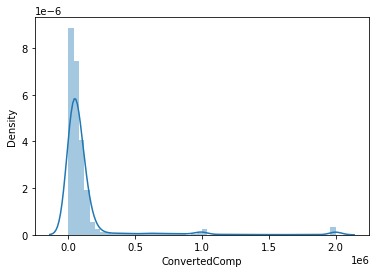

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import seaborn as sn

sn.distplot(df['ConvertedComp'])

#### Plot the histogram for the column `ConvertedComp`.


(array([9659.,  238.,  115.,  125.,   99.,  131.,   34.,   15.,   15.,
         151.]),
 array([      0.,  200000.,  400000.,  600000.,  800000., 1000000.,
        1200000., 1400000., 1600000., 1800000., 2000000.]),
 <BarContainer object of 10 artists>)

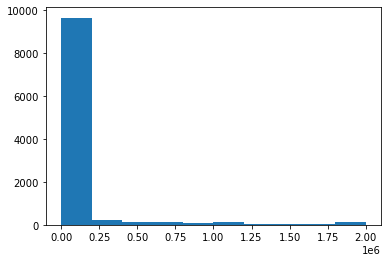

In [5]:
plt.hist(df['ConvertedComp'])

### What is the median of the column `ConvertedComp`?


In [22]:
df.ConvertedComp.median()
#df.Age.median()

57745.0

### How many responders identified themselves only as a **Man**?


In [23]:
df['Gender'].value_counts()

Man                                                            10480
Woman                                                            731
Non-binary, genderqueer, or gender non-conforming                 63
Man;Non-binary, genderqueer, or gender non-conforming             26
Woman;Non-binary, genderqueer, or gender non-conforming           14
Woman;Man                                                          9
Woman;Man;Non-binary, genderqueer, or gender non-conforming        2
Name: Gender, dtype: int64

### Find out the  median ConvertedComp of responders identified themselves only as a **Woman**?


In [8]:
df.loc[df['Gender']=='Woman', ['ConvertedComp']].median()

ConvertedComp    57708.0
dtype: float64

### Give the five number summary for the column `Age`?


**Double click here for hint**.

<!--
min,q1,median,q3,max of a column are its five number summary.
-->


In [9]:
df['Age'].describe()

count    11111.000000
mean        30.778895
std          7.393686
min         16.000000
25%         25.000000
50%         29.000000
75%         35.000000
max         99.000000
Name: Age, dtype: float64

### Plot a histogram of the column `Age`.


(array([ 116., 5645., 4040., 1029.,  248.,   29.]),
 array([10, 20, 30, 40, 50, 60, 70]),
 <BarContainer object of 6 artists>)

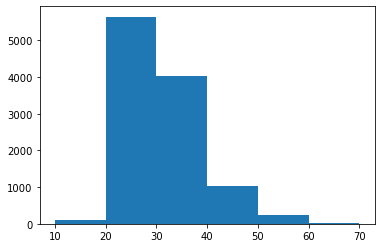

In [10]:
plt.hist(df['Age'],bins=[10,20,30,40,50,60,70])


## Outliers


### Finding outliers


Find out if outliers exist in the column `ConvertedComp` using a box plot?


C:\Users\Kingston\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='ConvertedComp'>

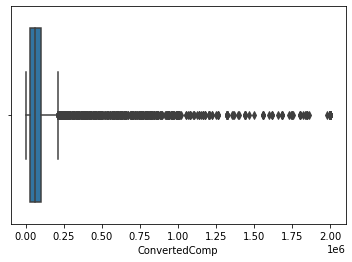

In [28]:
sn.boxplot(df['ConvertedComp'])
#sn.boxplot(df['Age'])

### Find out the Inter Quartile Range for the column `ConvertedComp`.


In [12]:

q1 = df['ConvertedComp'].quantile(.25)
q3 = df['ConvertedComp'].quantile(.75)

iqr = df['ConvertedComp'][df['ConvertedComp'].between(df['ConvertedComp'].quantile(.25), df['ConvertedComp'].quantile(.75), inclusive=True)]

mask = df['ConvertedComp'].between(q1, q3, inclusive=True)
iqr = df.loc[mask, 'ConvertedComp']


iqr_q3_q1 = q3 - q1
print(iqr)
print('The IQR for the q1 and q3:', iqr_q3_q1)

0        61000.0
1        95179.0
2        90000.0
4        65277.0
5        31140.0
          ...   
11386    47724.0
11387    39180.0
11389    35518.0
11391    68748.0
11396    80371.0
Name: ConvertedComp, Length: 5380, dtype: float64
The IQR for the q1 and q3: 73132.0


### Find out the upper and lower bounds.


In [13]:
lower_bound = q1 -(1.5 * iqr_q3_q1)
upper_bound = q3 +(1.5 * iqr_q3_q1)
print(lower_bound)
print(upper_bound)

-82830.0
209698.0


### Identify how many outliers are there in the `ConvertedComp` column.


In [14]:
df_no_outliers=df[(df.ConvertedComp>=lower_bound)& (df.ConvertedComp<=upper_bound)]
df_no_outliers.shape

(9703, 85)

### Create a new dataframe by removing the outliers from the `ConvertedComp` column.


In [15]:
df_no_outliers=df[(df.ConvertedComp>=lower_bound)& (df.ConvertedComp<=upper_bound)]
df_no_outliers

,Respondent,MainBranch,Hobbyist,OpenSourcer,OpenSource,Employment,Country,Student,EdLevel,UndergradMajor,...,WelcomeChange,SONewContent,Age,Gender,Trans,Sexuality,Ethnicity,Dependents,SurveyLength,SurveyEase
0,4,I am a developer by profession,No,Never,The quality of OSS and closed source software ...,Employed full-time,United States,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,22.0,Man,No,Straight / Heterosexual,White or of European descent,No,Appropriate in length,Easy
1,9,I am a developer by profession,Yes,Once a month or more often,The quality of OSS and closed source software ...,Employed full-time,New Zealand,No,Some college/university study without earning ...,"Computer science, computer engineering, or sof...",...,Just as welcome now as I felt last year,NaN,23.0,Man,No,Bisexual,White or of European descent,No,Appropriate in length,Neither easy nor difficult
2,13,I am a developer by profession,Yes,Less than once a month but more than once per ...,"OSS is, on average, of HIGHER quality than pro...",Employed full-time,United States,No,"Master’s degree (MA, MS, M.Eng., MBA, etc.)","Computer science, computer engineering, or sof...",...,Somewhat more welcome now than last year,Tech articles written by other developers;Cour...,28.0,Man,No,Straight / Heterosexual,White or of European descent,Yes,Appropriate in length,Easy
4,17,I am a developer by profession,Yes,Less than once a month but more than once per ...,The quality of OSS and closed source software ...,Employed full-time,Australia,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,29.0,Man,No,Straight / Heterosexual,Hispanic or Latino/Latina;Multiracial,No,Appropriate in length,Easy
5,19,I am a developer by profession,Yes,Never,The quality of OSS and closed source software ...,Employed full-time,Brazil,No,Some college/university study without earning ...,"Computer science, computer engineering, or sof...",...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,31.0,Man,No,Straight / Heterosexual,Hispanic or Latino/Latina,Yes,Too long,Easy
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11392,25134,I am a developer by profession,Yes,Less than once a month but more than once per ...,"OSS is, on average, of HIGHER quality than pro...",Employed full-time,Ecuador,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",...,Somewhat less welcome now than last year,Tech articles written by other developers,32.0,Man,No,Straight / Heterosexual,Hispanic or Latino/Latina,No,Appropriate in length,Easy
11393,25136,I am a developer by profession,Yes,Never,"OSS is, on average, of HIGHER quality than pro...",Employed full-time,United States,No,"Master’s degree (MA, MS, M.Eng., MBA, etc.)","Computer science, computer engineering, or sof...",...,Just as welcome now as I felt last year,Tech articles written by other developers;Cour...,36.0,Man,No,Straight / Heterosexual,White or of European descent,No,Appropriate in length,Difficult
11394,25137,I am a developer by profession,Yes,Never,The quality of OSS and closed source software ...,Employed full-time,Poland,No,"Master’s degree (MA, MS, M.Eng., MBA, etc.)","Computer science, computer engineering, or sof...",...,A lot more welcome now than last year,Tech articles written by other developers;Tech...,25.0,Man,No,Straight / Heterosexual,White or of European descent,No,Appropriate in length,Neither easy nor difficult
11395,25138,I am a developer by profession,Yes,Less than once per year,The quality of OSS and closed source software ...,Employed full-time,United States,No,"Master’s degree (MA, MS, M.Eng., MBA, etc.)","Computer science, computer

### What is the median of the column `ConvertedComp` after removing outliers?

In [25]:
df_no_outliers.ConvertedComp.median()

52704.0

### What is the mean of the column `ConvertedComp` after removing outliers?

In [26]:
df_no_outliers.ConvertedComp.mean()

59883.20838915799

## Correlation


### Finding correlation


#### Find the correlation between `Age` and all other numerical columns.


In [16]:
df.corr()

,Respondent,CompTotal,ConvertedComp,WorkWeekHrs,CodeRevHrs,Age
Respondent,1.000000,-0.013490,0.002181,-0.015314,0.004621,0.004041
CompTotal,-0.013490,1.000000,0.001037,0.003510,0.007063,0.006970
ConvertedComp,0.002181,0.001037,1.000000,0.021143,-0.033865,0.105386
WorkWeekHrs,-0.015314,0.003510,0.021143,1.000000,0.026517,0.036518
CodeRevHrs,0.004621,0.007063,-0.033865,0.026517,1.000000,-0.020469
Age,0.004041,0.006970,0.105386,0.036518,-0.020469,1.000000


## Authors


Mohamad Nael QAWAS